## **Mango**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from numpy                        import save
from keras.utils                  import np_utils
from keras.preprocessing          import  image
from keras.preprocessing.image    import load_img, img_to_array,array_to_img,ImageDataGenerator
from sklearn.model_selection      import train_test_split
from keras.backend                import dropout
from tensorflow.keras.optimizers  import Adam, SGD
from keras.callbacks              import ModelCheckpoint
from keras.models                 import Sequential
from keras.layers                 import Dense, Activation, Conv2D, MaxPooling2D, Flatten

In [ ]:
dir_folder = '/content/drive/MyDrive/AI/Mango/Train'
x_train = []
y_train = []
labels = []
count = 0
img_height = 150
img_width = 150
for i in os.listdir(dir_folder):
  path = os.path.join(dir_folder, i)
  labels.append(str(i))
  for j in os.listdir(path):
    path_img = os.path.join(path,j)
    img = load_img(path_img, target_size=(img_height,img_width)) 
    img = img_to_array(img)
    img = img.reshape(img_height,img_width,3) 
    img = img.astype('float32')
    img = img/255
    x_train.append(img)
    y_train.append(count)
  count += 1
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
y_train = np_utils.to_categorical(y_train)
print(x_train.shape, y_train.shape)

save('mango_x_train.npy', x_train)
save('mango_y_train.npy', y_train)

(1220, 150, 150, 3) (1220, 3)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1, random_state = 70)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(y_test[:5])

(1098, 150, 150, 3) (1098, 3)
(122, 150, 150, 3) (122, 3)
[[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(512,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))  #Dense la full connected 
model.add(Dense(3, activation='softmax')) 
model.summary()
opt = SGD(lr=0.01, momentum=0.9)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(optimizer=opt,loss='categorical_crossentropy',  metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 18, 18, 128)     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
checkpoint = ModelCheckpoint('best_model_mango.h5', monitor='val_loss', verbose=1,
                             save_best_only= True, mode='auto')

history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test),  
                    callbacks=[checkpoint], verbose=1)
model.save('model_mango.h5')

Epoch 1/50
35/35 [==============================] - ETA: 0s - loss: 1.2058 - accuracy: 0.4791
Epoch 1: val_loss improved from inf to 0.92407, saving model to best_model_mango.h5
35/35 [==============================] - 81s 2s/step - loss: 1.2058 - accuracy: 0.4791 - val_loss: 0.9241 - val_accuracy: 0.5246
Epoch 2/50
35/35 [==============================] - ETA: 0s - loss: 0.9360 - accuracy: 0.5838
Epoch 2: val_loss improved from 0.92407 to 0.91250, saving model to best_model_mango.h5
35/35 [==============================] - 76s 2s/step - loss: 0.9360 - accuracy: 0.5838 - val_loss: 0.9125 - val_accuracy: 0.5984
Epoch 3/50
35/35 [==============================] - ETA: 0s - loss: 0.8454 - accuracy: 0.6457
Epoch 3: val_loss improved from 0.91250 to 0.72842, saving model to best_model_mango.h5
35/35 [==============================] - 76s 2s/step - loss: 0.8454 - accuracy: 0.6457 - val_loss: 0.7284 - val_accuracy: 0.7377
Epoch 4/50
35/35 [==============================] - ETA: 0s - loss: 0.8

In [ ]:
#load data
from keras.models import load_model
model = load_model('/content/model_mango.h5')
#Kiểm tra chương trình dữ liệu
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss:',score[0])
print('Test accuracy', score[1])

Test loss: 0.08184387534856796
Test accuracy 0.9754098653793335


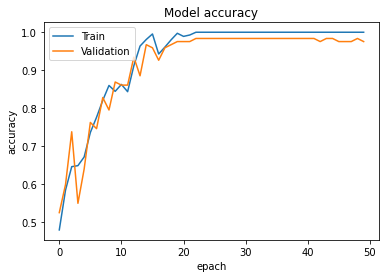

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epach')
plt.legend(['Train','Validation'],loc='upper left')
plt.show
plt.show()

Defect Mango is:  thanthu  -   Accuracy:  99.97 %


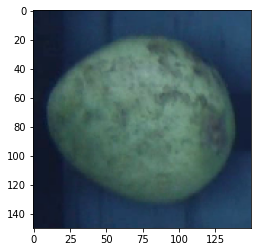

In [ ]:
from keras.preprocessing.image   import load_img
from keras.preprocessing.image  import img_to_array
from keras.models               import load_model
import numpy as np
import matplotlib.pyplot as plt

classes = ["khongkt","thoitrai","thanthu"]
img = load_img('/content/drive/MyDrive/AI/Mango/Train/Than_thu/thanthu.310.jpg', target_size=(150,150))
# load model
model = load_model('/content/best_model_mango.h5')

plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,150,150,3)
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
score = y_pred.max()
score = round(score*100,2)
y_classes = [np.argmax(element) for element in y_pred]
print('Defect Mango is: ',classes[y_classes[0]]," -   Accuracy: ",score, "%")